# Seed Creation via Clustering

In [62]:
import pandas as pd 
df = pd.read_csv('Ideal Customer Profile - Bank Personal Loan Modelling.csv')

In [63]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [64]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
model = KMeans(n_clusters=5, init='k-means++',
                    max_iter=300, n_init=10, random_state=0)
X = df[['Age', 'Experience', 'Income', 'Family', 'CCAvg','Education', 'Mortgage']]
X_scaled = StandardScaler().fit_transform(X)
model.fit(X_scaled)

KMeans(n_clusters=5, n_init=10, random_state=0)

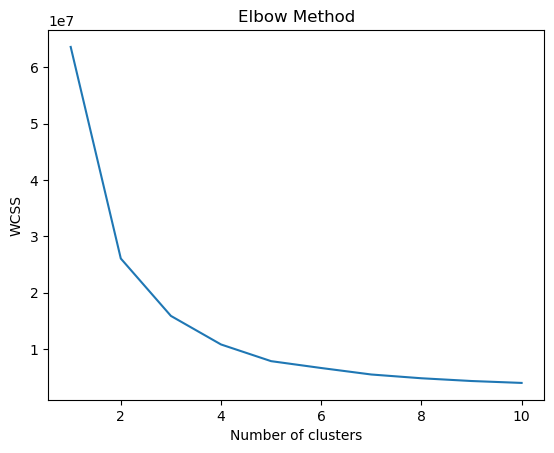

In [65]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Run k-means clustering for k=1 to 10 clusters
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++',
                    max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [66]:
df['Clusters'] =  kmeans.labels_

In [67]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Clusters
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,7
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,7
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,7
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,5
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,7


In [68]:
df[df['Personal Loan'] ==1].groupby(['Clusters'])\
                        .mean()[['Age', 'Experience', 'Income', 'Family', 'CCAvg','Education', 'Mortgage']]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage
Clusters,,,,,,,
0,46.702128,21.425532,141.382979,2.574468,4.256809,2.404255,130.382979
2,47.462963,22.055556,149.870370,2.814815,3.442963,2.074074,327.629630
3,44.676471,19.453782,155.554622,2.529412,4.081723,2.277311,0.000000
4,46.379310,21.206897,137.517241,2.689655,3.317241,2.206897,227.344828
5,44.243243,19.135135,102.527027,2.675676,3.325405,2.135135,0.000000
8,43.885714,18.685714,168.971429,2.828571,4.695714,2.257143,501.171429
9,28.666667,4.000000,76.333333,1.333333,3.500000,1.333333,150.666667
